In [2]:
import pandas as pd
data = pd.read_csv("medical_costs.csv")

# Take a quick look at the data 

In [3]:
data.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,male,15.6,2,yes,northwest,17907.54
1,24,male,29.8,0,yes,northeast,16312.64
2,50,male,29.0,5,no,northwest,6819.21
3,35,male,34.0,1,no,southeast,5247.87
4,31,female,17.6,3,yes,southeast,17525.49


In [4]:
data.describe()

,Age,BMI,Children,Medical Cost
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.678400,27.40301,2.501700,11898.932216
std,13.807724,7.22896,1.701672,6073.875834
min,18.000000,15.00000,0.000000,3617.090000
25%,30.000000,21.10000,1.000000,5909.925000
50%,42.000000,27.40000,2.000000,7957.430000
75%,54.000000,33.70000,4.000000,17931.962500
max,65.000000,40.00000,5.000000,20268.210000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           10000 non-null  int64  
 1   Sex           10000 non-null  object 
 2   BMI           10000 non-null  float64
 3   Children      10000 non-null  int64  
 4   Smoker        10000 non-null  object 
 5   Region        10000 non-null  object 
 6   Medical Cost  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


### Summary : the data contains 6 features. There is no missing data and there are 3 categorical features that have to be converted to numerical ones later at the data preparation for the ML code 

# Explore the data 

## Visualize the data 

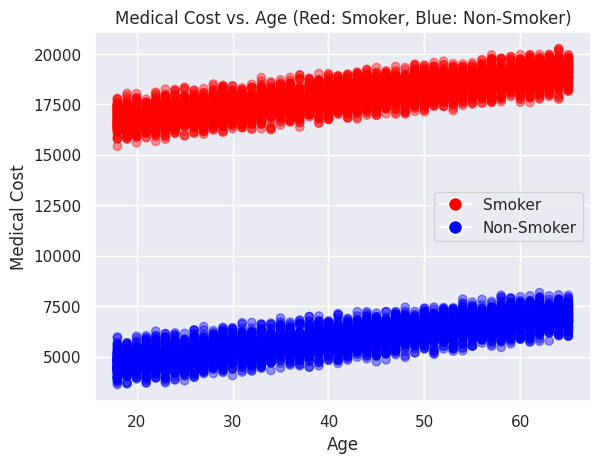

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


colors = {'yes': 'red', 'no': 'blue'}

# Plot scatter plot: Age vs. Medical Cost, with color representing smoker status
plt.scatter(data['Age'], data['Medical Cost'], c=data['Smoker'].map(colors), alpha=0.4)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Medical Cost')
plt.title('Medical Cost vs. Age (Red: Smoker, Blue: Non-Smoker)')

# Create a legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Smoker'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Non-Smoker')]
plt.legend(handles=legend_elements)

# Show the plot
plt.show()

### Caption for figure above: The medical Cost as a function of the age of the person. In red and blue, I show smoker and non smoker persons, respectively. 
### Analysis: The medical cost increases as the age increases for both smoker and non-smoker cases. Smoking makes a huge impact on the medical cost, where it changes from a range of 2500-7500 to 15000-20000, indicating how smoking is dangerous on health. 

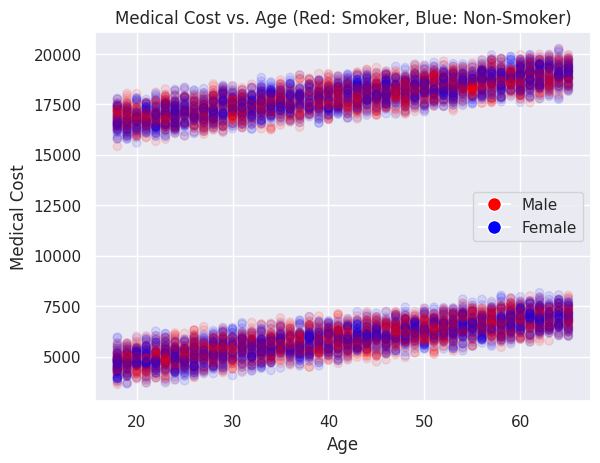

In [49]:
colors = {'male': 'red', 'female': 'blue'}

# Plot scatter plot: Age vs. Medical Cost, with color representing smoker status
plt.scatter(data['Age'], data['Medical Cost'], c=data['Sex'].map(colors), alpha=0.1)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Medical Cost')
plt.title('Medical Cost vs. Age (Red: Smoker, Blue: Non-Smoker)')

# Create a legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Male'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Female')]
plt.legend(handles=legend_elements)

# Show the plot
plt.show()

### Analysis: There is no distinguish between the gender. 

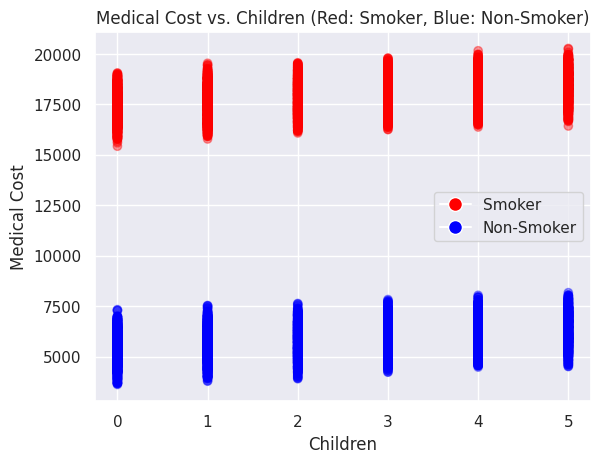

In [55]:

colors = {'yes': 'red', 'no': 'blue'}

# Plot scatter plot: Age vs. Medical Cost, with color representing smoker status
plt.scatter(data['Children'], data['Medical Cost'], c=data['Smoker'].map(colors), alpha=0.4)

# Add labels and title
plt.xlabel('Children')
plt.ylabel('Medical Cost')
plt.title('Medical Cost vs. Children (Red: Smoker, Blue: Non-Smoker)')

# Create a legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Smoker'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Non-Smoker')]
plt.legend(handles=legend_elements)

# Show the plot
plt.show()

# Create data test and data training

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
data_train, data_test = train_test_split(data, test_size=0.3, random_state=42)

In [6]:
data_train

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
9069,54,male,20.1,3,yes,southwest,17973.09
2603,24,male,19.4,5,yes,northeast,17154.51
7738,43,female,28.6,3,no,northeast,6373.78
1579,25,male,36.2,0,no,southeast,4942.53
5058,27,male,29.0,0,yes,northeast,16410.69
...,...,...,...,...,...,...,...
5734,25,female,24.8,3,yes,northwest,16616.70
5191,32,male,31.6,4,no,northeast,5824.31
5390,43,female,19.9,4,no,southwest,5833.18
860,19,male,16.4,4,yes,northeast,16950.08


In [8]:
data_test

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
6252,18,male,23.3,3,no,southwest,5169.52
4684,41,male,32.0,5,yes,northwest,18341.62
1731,51,female,35.7,5,yes,northeast,19570.67
4742,62,male,36.1,4,no,northeast,7553.72
4521,63,female,19.4,4,yes,southeast,18981.01
...,...,...,...,...,...,...,...
8014,41,male,25.0,2,no,southwest,5282.92
1074,30,male,20.2,5,yes,northwest,17541.79
3063,45,female,39.8,5,no,southwest,6699.30
6487,43,female,32.1,0,no,northeast,5798.23


# Prepare the data for ML

In [13]:
data_train_features =  data_train.drop("Medical Cost",axis=1)
data_train_labels = data_train["Medical Cost"]
data_test_features =  data_test.drop("Medical Cost",axis=1)
data_test_labels = data_test["Medical Cost"]

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
conv_sex = LabelEncoder()
data_train_features["Sex"] = conv_sex.fit_transform(data_train_features["Sex"])
conv_smoker = LabelEncoder()
data_train_features["Smoker"] = conv_sex.fit_transform(data_train_features["Smoker"])
conv_region = LabelEncoder()
data_train_features["Region"] = conv_sex.fit_transform(data_train_features["Region"])

conv_sex = LabelEncoder()
data_test_features["Sex"] = conv_sex.fit_transform(data_test_features["Sex"])
conv_smoker = LabelEncoder()
data_test_features["Smoker"] = conv_sex.fit_transform(data_test_features["Smoker"])
conv_region = LabelEncoder()
data_test_features["Region"] = conv_sex.fit_transform(data_test_features["Region"])



# Train a ML model

In [20]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(data_train_features, data_train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

# Evaluate the model

In [21]:
label_pred = model.predict(data_test_features)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f'Mean Absolute Error: {mean_absolute_error(data_test_labels, label_pred)}')

Mean Absolute Error: 268.6023450025146
